In [1]:
#importing necessary libraries for calculations and simulations

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [28]:
def dSdt_linear(t, S):
    x, v_x, y, v_y, z, v_z = S
    dSdt = [v_x, 
            2*n*v_y + 3*n**2*x, 
            v_y, 
            -2*n*v_x, 
            v_z, 
            -n**2*z]
    
    return dSdt

def dSdt_nonlinear(t, S):
    x, v_x, y, v_y, z, v_z = S
    dSdt = [v_x, 
           2 * n * v_y + n**2 * x - mu*(r0+x)/((r0+x)**2+y**2+z**2)**(3/2) + mu/r0**2,
            v_y,
            - 2 * n * v_x + n**2 * y - mu*y/((r0+x)**2+y**2+z**2)**(3/2),
            v_z,
            -mu*z/((r0+x)**2+y**2+z**2)**(3/2)]
            
    return dSdt

In [33]:
n = 1
mu = 1
r0 = 1
x0 = 0.1
v_x0 = 0
y0 = 0
v_y0 = -3/2*n*x0
z0 = 0
v_z0 = 0

In [34]:
t = np.linspace(0, 50, 10000) #sets the number of laps taken
S0 = (x0, v_x0, y0, v_y0, z0, v_z0)
sol_linear = odeint(dSdt_linear, y0=S0, t=t, tfirst=True)
sol_nonlinear = odeint(dSdt_nonlinear, y0=S0, t=t, tfirst=True)

In [35]:
r_linear = []
r_nonlinear = []
for i in range(len(t)):
    r_linear.append(np.sqrt(sol_linear.T[0][i]**2 + sol_linear.T[2][i]**2 +sol_linear.T[4][i]**2))
    r_nonlinear.append(np.sqrt(sol_nonlinear.T[0][i]**2 + sol_nonlinear.T[2][i]**2 +sol_nonlinear.T[4][i]**2))

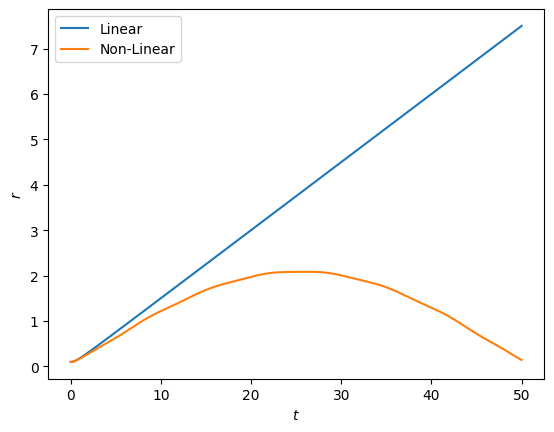

In [36]:
plt.plot(t, r_linear, label = 'Linear')
plt.plot(t, r_nonlinear, label= 'Non-Linear')

# Add labels and legend
plt.xlabel('$t$')
plt.ylabel('$r$')
plt.legend()

# Save the figure
plt.savefig('r_linear_vs_nonlinear_0.1.png')

# Show the plot
plt.show()